<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [350]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Read in the Sacramento housing data set.

In [351]:
sac_csv = '../3_01-lab-linear_regression-regression/datasets/sacramento_real_estate_transactions.csv'

In [352]:
pd1 = pd.read_csv(sac_csv)

In [353]:
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [354]:
pd1.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [355]:
#Converting 'zip' from integer to string
pd1['zip'] = pd1['zip'].astype(str)

In [356]:
pd1.zip.dtypes

dtype('O')

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

In [357]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null object
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


In [358]:
pd1.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [359]:
#There are houses with 0 Beds and Baths
#There are houses with negative sq_ft values
#There are house with negative pricing
#There are houses with wrongly identified negative latitude and positive longitude

In [360]:
pd1.street.value_counts()

1223 LAMBERTON CIR     2
4734 14TH AVE          2
8306 CURLEW CT         2
7 CRYSTALWOOD CIR      2
9197 CORTINA CIR       1
                      ..
7044 CARTHY WAY        1
4440 SYCAMORE AVE      1
645 MORRISON AVE       1
4128 HILL ST           1
7032 FAIR OAKS BLVD    1
Name: street, Length: 981, dtype: int64

In [361]:
pd1.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
NORTH HIGHLANDS     21
GALT                21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
WILTON               5
AUBURN               5
GOLD RIVER           4
ELVERTA              4
GRANITE BAY          3
WEST SACRAMENTO      3
POLLOCK PINES        3
RANCHO MURIETA       3
LOOMIS               2
EL DORADO            2
MEADOW VISTA         1
WALNUT GROVE         1
SLOUGHHOUSE          1
COOL                 1
FORESTHILL           1
DIAMOND SPRINGS      1
MATHER               1
GREENWOOD            1
PENRYN               1
SHINGLE SPRINGS      1
GARDEN VALLEY        1
Name: city, dtype: int64

In [362]:
pd1.state.value_counts()

CA    984
AC      1
Name: state, dtype: int64

In [363]:
#There is one house with incorrect state labelled to be AC when it should be CA

# Finding the incorrect values

In [364]:
#Finding out the values with 0 Beds
pd1[pd1['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [365]:
#There are 108 values of houses with 0 beds, baths and sq__ft

In [366]:
#Since it is a large number of houses, I am going to make the assumption that the land area is reserved to bulid a house in the future 

In [367]:
#Finding out the values with negative sq_ft
pd1[pd1['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [368]:
#Finding out the values with negative pricing
pd1[pd1['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [369]:
#Finding out the values with wrongly identified negative latitude and positive longitude
pd1[pd1['latitude'] < 38]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [370]:
pd1[pd1['longitude'] > -120]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [371]:
#This shows that the value of 1900 DANBROOK DR has incorrect sq__ft, price, latitude and longitude values as well as wrongly labelled state 
#Therefore, the value can be dropped 

In [372]:
pd1.drop(703, inplace=True)

In [373]:
pd1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 984
Data columns (total 12 columns):
street       984 non-null object
city         984 non-null object
zip          984 non-null object
state        984 non-null object
beds         984 non-null int64
baths        984 non-null int64
sq__ft       984 non-null int64
type         984 non-null object
sale_date    984 non-null object
price        984 non-null int64
latitude     984 non-null float64
longitude    984 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 99.9+ KB


When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [374]:
#Saving the cleaned data
pd1.to_csv('../3_01-lab-linear_regression-regression/datasets/sacramento_real_estate_transactions_cleaned.csv')

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

<a id='assumptions'></a>

## Assumptions of MLR

---

Like SLR, there are assumptions associated with MLR. Luckily, they're quite similar to the SLR assumptions.

1. **Linearity:** $Y$ must have an approximately linear relationship with each independent $X_i$.
2. **Independence:** Errors (residuals) $\varepsilon_i$ and $\varepsilon_j$ must be independent of one another for any $i \ne j$.
3. **Normality:** The errors (residuals) follow a Normal distribution with mean 0.
4. **Equality of Variances**: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the $X_i$ predictors. (There should be no discernable relationship between the $X$ predictors and the residuals.)
5. **Independence of Predictors**: The independent variables $X_i$ and $X_j$ must be independent of one another for any $i \ne j$.

The mnemonic LINEI is a useful way to remember these five assumptions.

In [375]:
pd1.dtypes

street        object
city          object
zip           object
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [376]:
#We could use number of beds, baths and the size of sq__ft as predictors of price in an SLR model 

In [377]:
price = pd1.price

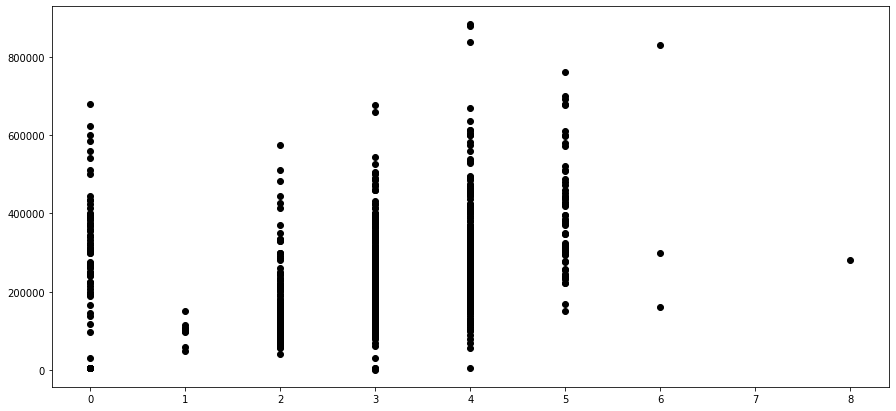

In [378]:
# create a figure for the relationship between price and no. of beds 
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

ax.scatter(pd1.beds, price, c="k")

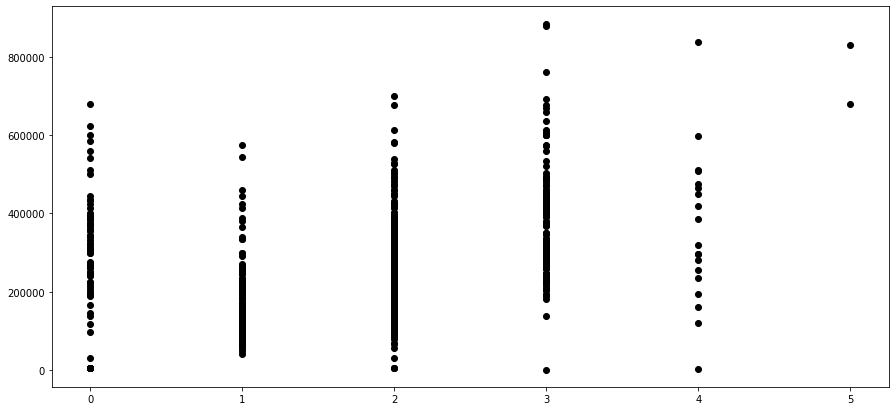

In [379]:
# create a figure for the relationship between price and no. of baths
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

ax.scatter(pd1.baths, price, c="k")

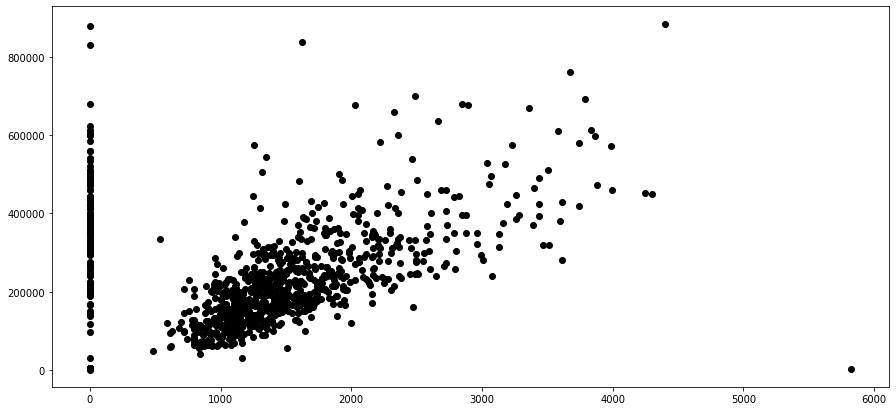

In [380]:
# create a figure for the relationship between price and size of house
fig = plt.figure(figsize=(15,7))
# get the axis of that figure
ax = plt.gca()

ax.scatter(pd1.sq__ft, price, c="k")

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

In [381]:
#Size of the house (sq__ft) seems to be the best predictor as compared to number of bedrooms (beds) and bathrooms (baths)
#As sizes of the house (sq__ft) are continuous values in contrast to (beds) and (baths) which are discrete values, it will be a better to observe a positive trend line

In [382]:
(pd1.sq__ft == 0).value_counts()

False    813
True     171
Name: sq__ft, dtype: int64

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [383]:
def lin_reg(x,y):
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    #Print the Optimal Values
    print('The y-intercept is',beta_0)
    print('The slope coefficient is',beta_1)

In [384]:
x = pd1['sq__ft'].values
y = pd1['price'].values

In [385]:
lin_reg(x,y)

The y-intercept is 162938.7375609862
The slope coefficient is 54.15619752295772


### 6. Interpret the intercept. Interpret the slope.

The intercept is the expected mean value of Y when all X = 0.
So that means when sq_ft is zero, the baseline price of the land area is ~$16,2939

The slope is the increase (or decrease) in price when one unit of X increase(or decrease) .
So that means for every sq__ft increase, there is an relative increase of ~$54 in price

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [386]:
#Prospective house buyer to estimate the most likely price range that these houses are selling for 
#Realtor to estimate the most likely price range that these houses can be sold for 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

### $$RSS = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 $$

In [387]:
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [388]:
pd1['Mean_pricehat'] = np.mean(pd1['price'])

In [389]:
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_pricehat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234167.841463
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234167.841463
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234167.841463
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234167.841463
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234167.841463


In [390]:
# Calculate SSE
sse_mean = np.sum(np.square(pd1['price'] - pd1['Mean_pricehat']))

In [391]:
sse_mean

18838244939613.266

In [392]:
#Calculate MSE
mse_mean = np.mean(np.square(pd1['price'] - pd1['Mean_pricehat']))

In [393]:
mse_mean

19144557865.460644

In [394]:
rmse_mean = np.mean(np.square(pd1['price'] - pd1['Mean_pricehat']))**0.5

In [395]:
rmse_mean

138363.86040242098

In [396]:
lin_reg(x,y)

The y-intercept is 162938.7375609862
The slope coefficient is 54.15619752295772


In [397]:
beta_0 = 162938.7375609862
beta_1 = 54.15619752295772

In [398]:
pd1[['sq__ft','price','Mean_pricehat']].corr()

,sq__ft,price,Mean_pricehat
sq__ft,1.000000e+00,3.338611e-01,2.750872e-16
price,3.338611e-01,1.000000e+00,8.602105e-16
Mean_pricehat,2.750872e-16,8.602105e-16,1.000000e+00


In [399]:
# predict with model
pd1['Linear_pricehat'] = beta_1 * pd1['sq__ft'] + beta_0 

In [400]:
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_pricehat,Linear_pricehat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234167.841463,208213.318690
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234167.841463,226139.020070
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234167.841463,206047.070789
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234167.841463,209079.817851
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234167.841463,206101.226987


In [401]:
print(np.square(pd1['price'] - pd1['Linear_pricehat']).mean())
print(np.square(pd1['price'] - pd1['Mean_pricehat']).mean())

17010643325.483322
19144557865.460644


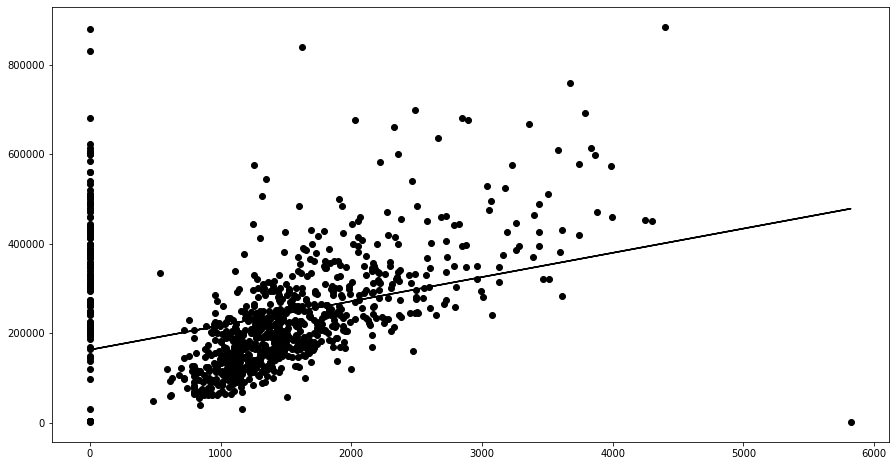

In [402]:
# create a figure for Residuals
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=pd1['sq__ft'], y=pd1['price'], c='k')
ax.plot(pd1['sq__ft'], pd1['Linear_pricehat'], color='k');


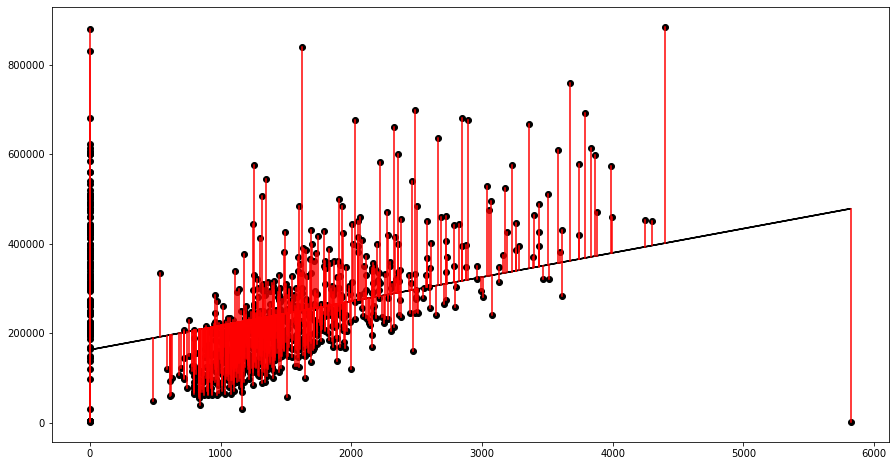

In [403]:
# create a figure for Residuals
fig = plt.figure(figsize=(15,7))
fig.set_figheight(8)
fig.set_figwidth(15)

# get the axis
ax = fig.gca()

# plot it
ax.scatter(x=pd1['sq__ft'], y=pd1['price'], c='k')
ax.plot(pd1['sq__ft'], pd1['Linear_pricehat'], color='k');


# iterate over predictions
for _, row in pd1.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['Linear_pricehat']), 'r-')

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [404]:
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_pricehat,Linear_pricehat
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234167.841463,208213.318690
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234167.841463,226139.020070
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234167.841463,206047.070789
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234167.841463,209079.817851
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234167.841463,206101.226987


In [405]:
pd1.type.value_counts()

Residential     917
Condo            53
Multi-Family     13
Unkown            1
Name: type, dtype: int64

In [406]:
dummy_type = pd.get_dummies(pd1['type'])
dummy_type.head()

,Condo,Multi-Family,Residential,Unkown
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [407]:
dummy_type.drop('Unkown', axis=1, inplace=True)


In [408]:
dummy_type.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [409]:
pd1 = pd1.merge(dummy_type, left_index=True, right_index=True)
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_pricehat,Linear_pricehat,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234167.841463,208213.318690,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234167.841463,226139.020070,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234167.841463,206047.070789,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234167.841463,209079.817851,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234167.841463,206101.226987,0,0,1


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

In [410]:
pd1.drop('Condo', axis=1, inplace=True)


In [411]:
pd1.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Mean_pricehat,Linear_pricehat,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,234167.841463,208213.318690,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,234167.841463,226139.020070,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,234167.841463,206047.070789,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,234167.841463,209079.817851,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,234167.841463,206101.226987,0,1


(10.0, 0.0)

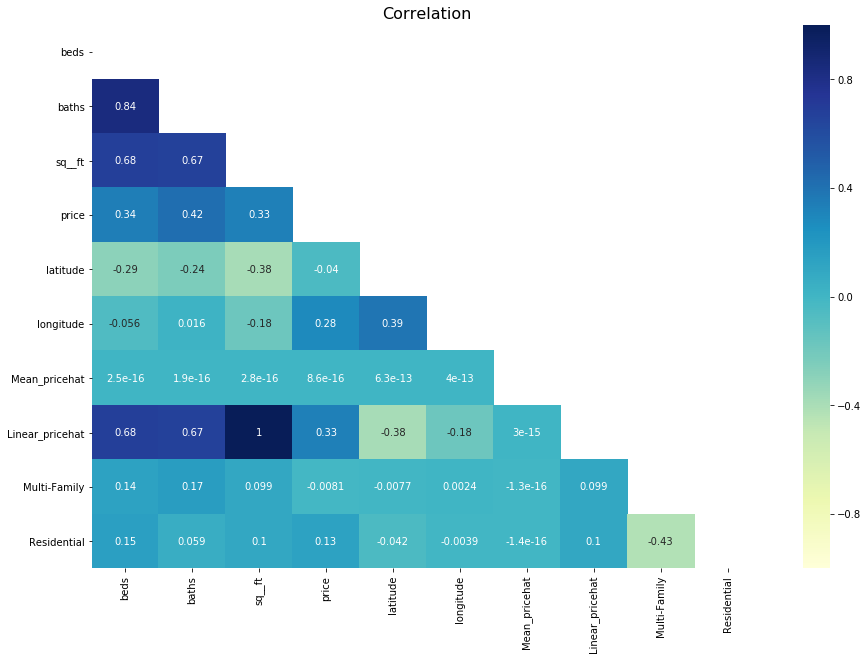

In [412]:
plt.figure(figsize = (15,10))
plt.title('Correlation', fontsize = 16)
mask = np.zeros(pd1.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
ax = sns.heatmap(pd1.corr(),mask=mask ,vmin = -1, vmax = 1, cmap="YlGnBu", center = 0, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [415]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

y = pd1['price']
X = pd1[['beds','baths','sq__ft','Multi-Family','Residential']]

lm = linear_model.LinearRegression()

model = lm.fit(X, y)
predictions = model.predict(X)

In [416]:
lm.score(X, y)

0.1940050381931977

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

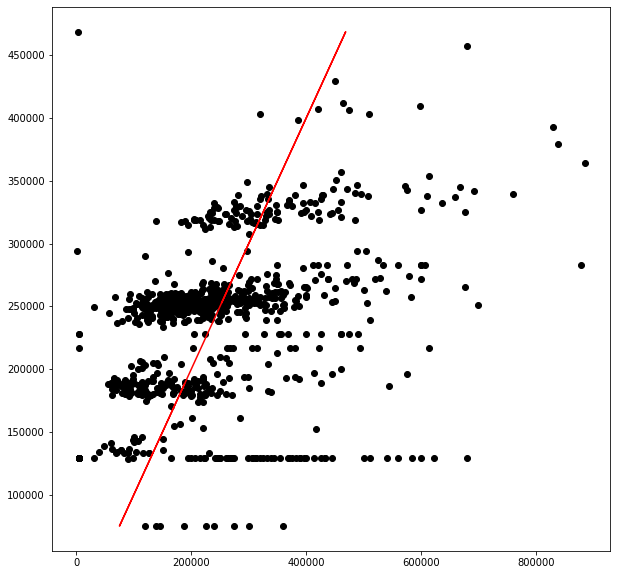

In [417]:
plt.figure(figsize=(10,10))

plt.scatter(y, predictions, c='k');
plt.plot(predictions, predictions, color='r');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- Linearity: Y and X must have an approximately linear relationship.
- Independence: Errors (residuals)  𝜀𝑖  and  𝜀𝑗  must be independent of one another for any  𝑖≠𝑗 .
- Normality: The errors (residuals) follow a Normal distribution with mean 0.
- Equality of Variances (Homoscedasticity of errors): The errors (residuals) should have a roughly consistent pattern, regardless of the value of X. (There should be no discernable relationship between X and the residuals.)
    
    
**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

- I would like to assume that the X and Y have a linear relationship - price of a home (Y) has an approximately linear relationship with each of the six X inputs 


### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
import statsmodels.api as sm

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [419]:
def r2_adj(X, y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    
    lr = linear_model.LinearRegression()
    model = lr.fit(X, y)
    
    r_squared = model.score(X, y)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    print("Adjusted R-squared: {}".format(adj_r_squared))

In [421]:
r2_adj(X, y)

Adjusted R-squared: 0.18988440955410357


### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [423]:
def regression_metrics(X, y):
    import sklearn.metrics as metrics
    import sklearn.linear_model as linear_model
    import pandas as pd
    
    linear = linear_model.LinearRegression()
    model = linear.fit(X, y)
    y_hat = model.predict(X)

    r_squared = model.score(X, y)
    mean_squared_err = metrics.mean_squared_error(y, y_hat)
    root_mean_squared_err = np.sqrt(mean_squared_err)
    mean_abs_err = metrics.mean_absolute_error(y, y_hat)
    median_abs_err = metrics.median_absolute_error(y, y_hat)
    adj_r_squared = 1 - (1 - r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    
    
    print("R-squared: {}".format(r_squared))
    print("Adjusted R-squared: {}".format(adj_r_squared))
    print("Mean Squared Error: {}".format(mean_squared_err))
    print("Root Mean Squared Error: {}".format(root_mean_squared_err))
    print("Mean Absolute Error: {}".format(mean_abs_err))
    print("Median Absolute Error: {}".format(median_abs_err))

In [424]:
regression_metrics(X, y)


R-squared: 0.1940050381931977
Adjusted R-squared: 0.18988440955410357
Mean Squared Error: 15430417185.580063
Root Mean Squared Error: 124219.2303372552
Mean Absolute Error: 93319.29800373236
Median Absolute Error: 77507.81428420609


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?